In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics  import r2_score
import pickle
import pymysql
import seaborn as sns

In [7]:
data = pd.read_csv("C:\Users\FELIX\Desktop\project_interface\originaldata.csv")


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3197673279.py, line 1)

In [4]:
data.head()

,Workno,Fname,Lastname,Password,Assets,Income,Liabilities,NetWorth,Experience,Salaries_Income
0,24510,SMITH,KEY,1090,31527021,15051170,209917,46368274,20,450000
1,24511,JOHNSON,COOKE,1090,25544792,3735087,885327,28394552,10,300000
2,24512,WILLIAMS,GOFF,1090,36945068,7891955,141357,44695666,20,450000
3,24513,BROWN,DEJESUS,1090,34193807,6574109,437782,40330134,20,450000
4,24514,JONES,MARIN,1090,41691472,12472813,852350,53311935,20,450000


In [5]:
data.describe()

,Workno,Password,Assets,Income,Liabilities,NetWorth,Experience,Salaries_Income
count,2000.000000,2000.0,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,25509.500000,1090.0,2.509794e+07,1.072483e+07,499880.480000,3.532288e+07,15.050000,368725.000000
std,577.494589,0.0,1.426266e+07,5.528058e+06,289216.970878,1.543596e+07,6.192146,94287.164607
min,24510.000000,1090.0,5.495320e+05,1.208513e+06,367.000000,2.262577e+06,4.000000,100000.000000
25%,25009.750000,1090.0,1.289222e+07,5.928608e+06,247571.000000,2.301829e+07,10.000000,300000.000000
50%,25509.500000,1090.0,2.478916e+07,1.080648e+07,500121.500000,3.550335e+07,15.000000,400000.000000
75%,26009.250000,1090.0,3.704469e+07,1.568087e+07,751536.500000,4.755050e+07,20.000000,450000.000000
max,26509.000000,1090.0,4.999497e+07,1.998239e+07,999998.000000,6.858409e+07,30.000000,500000.000000


In [19]:
#axis data

x = data[['Assets','Income','Liabilities','Experience','Salaries_Income']].values
x

array([[31527021, 15051170,   209917,       20,   450000],
       [25544792,  3735087,   885327,       10,   300000],
       [36945068,  7891955,   141357,       20,   450000],
       ...,
       [47419108, 14510358,   465200,       30,   500000],
       [11382082,  3051057,   282043,        8,   250000],
       [13258831,  4209560,   936129,        8,   250000]], dtype=int64)

In [7]:
y = data['NetWorth'].values
y

array([46368274, 28394552, 44695666, ..., 61464266, 14151096, 16532262],
      dtype=int64)

In [8]:
#ploting graph

In [9]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.5,random_state=0)


In [10]:
print("X_train",x_train.shape)

X_train (1000, 5)


In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
pred = model.predict(x_test)
pred

array([29580975.        ,  6346936.99999998, 45569431.00000001,
        4089388.99999998, 28330043.99999999, 32003428.        ,
       28766241.        , 49523364.00000001, 43175020.00000001,
       46646043.00000001, 46141052.00000001, 45338397.00000001,
       51578170.        , 63437002.00000001, 15930155.99999999,
       22275612.99999999, 40575919.00000001,  7598681.99999998,
       28293648.        , 43595134.        , 23905428.99999999,
       40628655.00000001, 35433328.        , 28680269.        ,
       46086872.00000001, 46241015.00000001, 36874948.        ,
       45494267.00000001, 30553231.        , 56537258.00000001,
       23720428.99999999, 32570253.        , 39573942.        ,
       32228617.99999999, 44219890.        , 23263280.99999999,
       54545616.00000001, 66625111.00000002, 47093934.00000001,
       22316387.99999999, 34065866.        , 55058213.00000001,
       20471685.99999999, 49068822.00000001, 16795069.99999999,
       60348818.00000001, 10377862.99999

In [13]:
#checking accuracy

r2_score(y_test,pred)

1.0

Text(0.5, 1.0, 'graph between predicted versus normal')

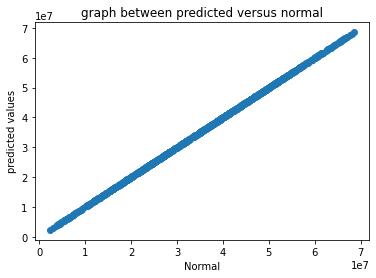

In [14]:
plt.scatter(y_test, pred)
plt.xlabel('Normal')
plt.ylabel('predicted values')
plt.title('graph between predicted versus normal')

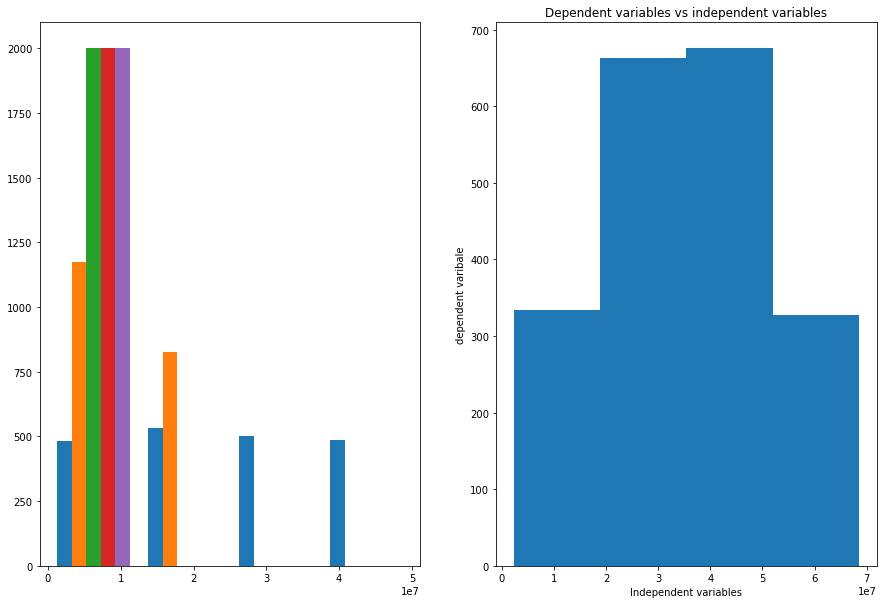

In [15]:
#histogram


n_bins = 4

fig, axs = plt.subplots(1,2,figsize=(15,10), sharey=False, tight_layout=False)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)
plt.title("Dependent variables vs independent variables")
plt.xlabel("Independent variables")
plt.ylabel("dependent varibale")

plt.show()

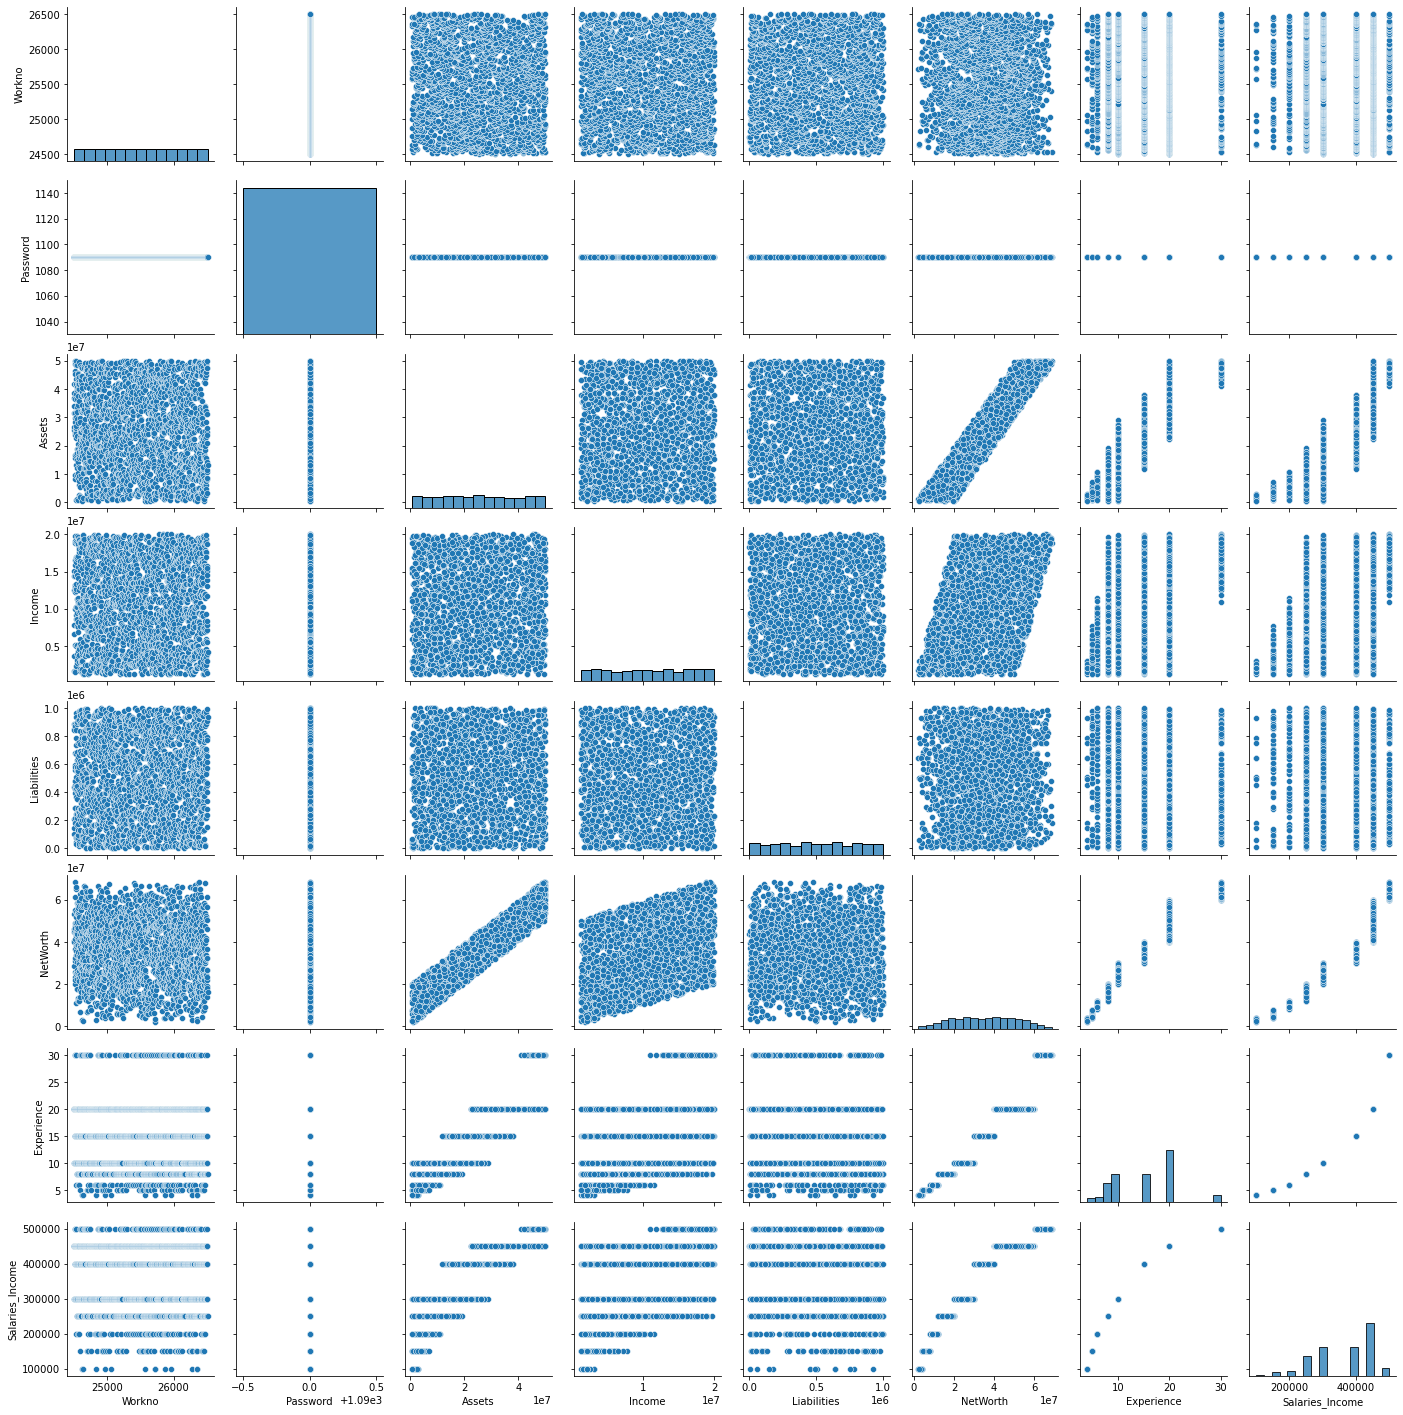

In [20]:
sns.pairplot(data)

Text(0.5, 1.0, 'Actual Net worth vs predicted net worth')

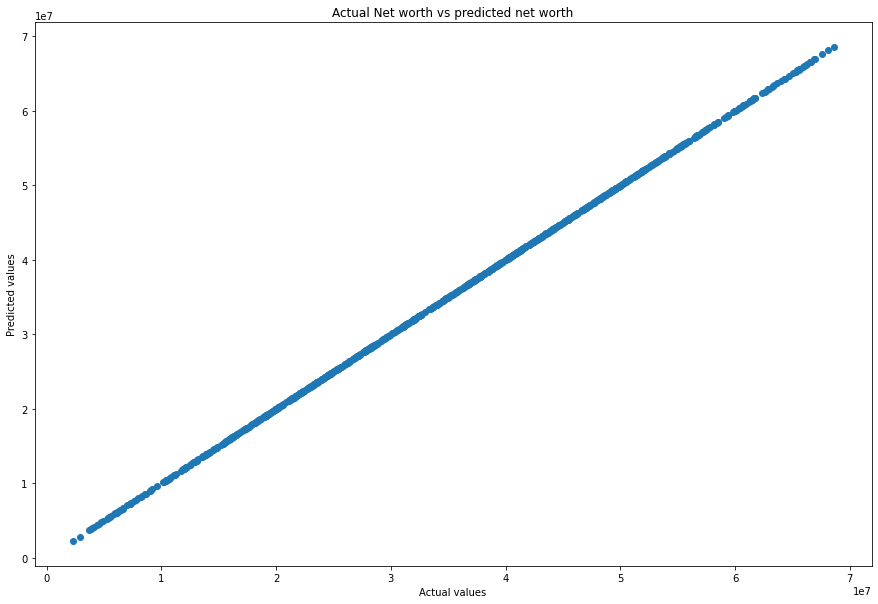

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual Net worth vs predicted net worth')

In [17]:
#coefficient

model.coef_

array([ 1.00000000e+00,  1.00000000e+00, -1.00000000e+00,  5.45916153e-11,
        1.27675648e-15])

In [17]:
#intercept

In [18]:
inter = model.intercept_

In [19]:
print(inter)

-5.960464477539063e-08


In [20]:

comp = pd.DataFrame({'Actual value':y_test,'Predicted value':pred,'Differences':y_test-pred})

#print the dataframe

print(comp[0:20])

    Actual value  Predicted value   Differences
0       16609969       16609969.0  3.352761e-08
1       25023936       25023936.0  1.862645e-08
2        7877318        7877318.0  4.470348e-08
3       40608414       40608414.0 -7.450581e-09
4       25992941       25992941.0  1.490116e-08
5       48316284       48316284.0 -1.490116e-08
6       36018277       36018277.0  0.000000e+00
7       47666475       47666475.0 -1.490116e-08
8       15764863       15764863.0  3.352761e-08
9        6745416        6745416.0  4.842877e-08
10      20369976       20369976.0  2.235174e-08
11      16904047       16904047.0  2.607703e-08
12      23537822       23537822.0  2.235174e-08
13      10940629       10940629.0  3.911555e-08
14      36405670       36405670.0  0.000000e+00
15      34919625       34919625.0  7.450581e-09
16      31770371       31770371.0  3.725290e-09
17      33562439       33562439.0  0.000000e+00
18      37406924       37406924.0  0.000000e+00
19       5666247        5666247.0  4.749

In [21]:
#saving the data to the database
getconnection = pymysql.connect(
                                 host = 'localhost',
                                 user = 'root',
                                 password = '',
                                 db = 'detectivesdb')

#successfully conncted to the database

#create a cursor

cur = getconnection.cursor()
cur

In [22]:
#creating columns

columns = "`,`".join([str(i) for i in data.columns.tolist()])

columns

#push dataframe records one at a time

#uding for loop iterate
for i,row in data.iterrows():
    query = "INSERT INTO 2020_declaration_stmt (`" +columns+"`) VALUES("+"%s,"*(len(row) - 1) + "%s)"
    cur.execute(query, tuple(row))
    
    #commit the changes
    getconnection.commit()

In [25]:
#saving the model
pickle.dump(model, open('pickle.pkl','wb'))

In [29]:
#checking the results of the pickle and comparing with the model

model = pickle.load(open('pickle.pkl','rb'))
model

LinearRegression()